In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# importing csv dataset
# source : https://www.kaggle.com/datasets/thedevastator/user-engagement-with-covid-misinformation-on-tik
# references: https://www.dominodatalab.com/blog/getting-started-with-k-means-clustering-in-python
df = pd.read_csv("tiktok.csv")

In [4]:
df.info

<bound method DataFrame.info of         views    likes  comments  official_source  pub_hcp  pub_news  \
0    18500000   534200      3507                1        0         0   
1    42400000  1100000      5137                1        0         0   
2    35200000   591400      3486                1        0         0   
3    26500000   872300      4412                0        0         0   
4    32400000  1000000      1977                0        0         0   
..        ...      ...       ...              ...      ...       ...   
161   5800000  1600000     10100                0        0         0   
162   9600000   576700      1016                0        0         0   
163   5800000   598700     40100                0        0         0   
164   7100000   635400      4531                0        0         0   
165  24000000  1100000      2920                0        0         0   

     pub_patient  pub_other  female  gender_other  ...  discern_high  \
0              0          0    

In [5]:
df.isnull().sum()

views                         0
likes                         0
comments                      0
official_source               0
pub_hcp                       0
pub_news                      0
pub_patient                   0
pub_other                     0
female                        0
gender_other                  0
age00                         0
age30                         0
age50                         0
age_unk                       0
topic_humor                   0
topic_ip                      0
topic_clinical                0
d_descriptionofriskfactors    0
d_descriptionofsymptoms       0
d_modesoftransmission         0
d_masks                       0
d_demonstratewearingmask      0
d_eyeprotection               0
d_handhygiene                 0
d_socialdistancing            0
d_testing                     0
d_preventiondiscussed         0
d_quarantining                0
d_commercialbias              0
masksent_pos                  0
masksent_neg                  0
masksent

In [6]:
df

,views,likes,comments,official_source,pub_hcp,pub_news,pub_patient,pub_other,female,gender_other,...,discern_high,discern_low,discern_mh,p_understand_high,p_action_high,misinfo_high,misinfo_mod,misinfo_level,misinfo_any,behavior_change
0,18500000,534200,3507,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
1,42400000,1100000,5137,1,0,0,0,0,0,0,...,1,0,1,1,1,0,0,0,0,1
2,35200000,591400,3486,1,0,0,0,0,0,0,...,1,0,1,1,1,0,0,0,0,1
3,26500000,872300,4412,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
4,32400000,1000000,1977,0,0,0,0,1,0,0,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,5800000,1600000,10100,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
162,9600000,576700,1016,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,1,1,0
163,5800000,598700,40100,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
164,7100000,635400,4531,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [7]:
X = df[['likes', 'views']].values

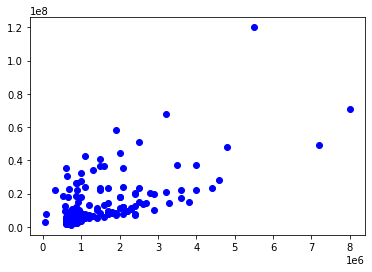

In [8]:
# Plot the data on a 2d graph
plotx = []
ploty = []
for i in range(len(X)):
    plotx.append(X[i][0])
    ploty.append(X[i][1])
plt.plot(plotx,ploty, 'bo')

In [9]:
def initiate_centroids(k, X):
    # First creates k number of centers randomly.
    # Randomly selects k points from the data X to use as initial centroids for the algorithm.
    Y = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[Y]
    return centroids

In [10]:
# Compute the distances between each point in X and each centroid, and assign each point to the nearest centroid.
def cal_distance(X, centroids):      
    # Then assign each data point to the closest centroid, all data points are labeled using nearest centers.
    labels = np.zeros(X.shape[0], dtype=int)
    for j in range(X.shape[0]):
        # Compute the distances between each point in X and each centroid, and assign each point to the nearest centroid.
        distances = np.linalg.norm(X[j] - centroids, axis=1)
        labels[j] = np.argmin(distances)
    return labels

In [11]:
# define the kmeans algorithm:
# max_iter, the maximum number of iterations to run the algorithm for
def kmeans(X, k, max_iter=100):
    #get the centroids
    centroids = initiate_centroids(k, X)

    for i in range(max_iter):
        #calculate the distance of each point and each centroid
        labels = cal_distance(X, centroids)
            

        # Update centroids to be the mean of their assigned data points
        new_centroids = np.empty_like(centroids)
        for i in range(k):
            new_centroids[i] = X[labels == i].mean(axis=0)

        # If the centroids haven't moved, stop the algorithm early
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

In [12]:
labels, centroids = kmeans(X, k=3)

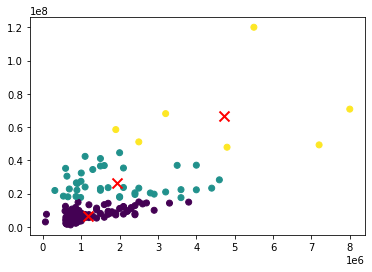

In [13]:
# Plot the data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidth=2, color='red')
plt.show()